<a href="https://colab.research.google.com/github/ameyshinde28/Human_Activity_Recognition/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Get Data

In [ ]:
import requests
import zipfile
from pathlib import Path
from tqdm.auto import tqdm

data_path = Path("data/")
har_path = data_path / "human_activity_recognition"


if har_path.is_dir():
  print(f"{har_path} directory already exists...skipping download")
else:
  print(f"{har_path} does not exist, creating one...")
  har_path.mkdir(parents=True, exist_ok=True)


with open(data_path / "human+activity+recognition+using+smartphones.zip", "wb") as f:
  request = requests.get("https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip")
  print("Downloading human activity dataset")
  f.write(request.content)


with zipfile.ZipFile(data_path / "human+activity+recognition+using+smartphones.zip", "r") as zip_ref:
  print("Unzipping human activity data")
  zip_ref.extractall(har_path)

data/human_activity_recognition does not exist, creating one...
Unzipping human activity data


In [ ]:
with zipfile.ZipFile("/content/data/human_activity_recognition/UCI HAR Dataset.zip", "r") as zip_ref:
  print("Unzipping human activity data")
  zip_ref.extractall(har_path)

Unzipping human activity data


### 1.1 EDA

In [ ]:
import pandas as pd


# Load the feature names

features = pd.read_csv("/content/data/human_activity_recognition/UCI HAR Dataset/features.txt",
                       delim_whitespace=True,
                       header=None)
features_names = features[1].to_list()
features_names

unique_feature_names = []

for i, feature in enumerate(features_names):
  if features_names[:i].count(feature) > 0:

    unique_feature_names.append(f"{feature}_{i}")

  else:
    unique_feature_names.append(feature)

unique_feature_names

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [ ]:
# Loading the training dataset
X_train = pd.read_csv("/content/data/human_activity_recognition/UCI HAR Dataset/train/X_train.txt",
                      delim_whitespace=True,
                      header=None,
                      names=unique_feature_names)
y_train = pd.read_csv("/content/data/human_activity_recognition/UCI HAR Dataset/train/y_train.txt",
                      delim_whitespace=True,
                      header=None,
                      names=['Activity'])

# Loading the testing dataset
X_test = pd.read_csv("/content/data/human_activity_recognition/UCI HAR Dataset/test/X_test.txt",
                     delim_whitespace=True,
                     header=None,
                     names=unique_feature_names)

y_test = pd.read_csv("/content/data/human_activity_recognition/UCI HAR Dataset/test/y_test.txt",
                      delim_whitespace=True,
                      header=None,
                      names=['Activity'])

# Combine training and testing data
X = pd.concat([X_train, X_test],
              axis=0).reset_index(drop=True)

y = pd.concat([y_train, y_test],
              axis=0).reset_index(drop=True)

In [ ]:
assert X_train.columns.is_unique, "Columns are not unique"

In [ ]:
# Understanding the data

print(f"Feature Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

print(f"Missing values in the dataset:\n{X.isnull().sum().sum()}")

print(X.describe())

Feature Data shape: (10299, 561)
Labels shape: (10299, 1)
Missing values in the dataset:
0
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.

<ipython-input-7-2e12a8fdde26>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y["Activity"],


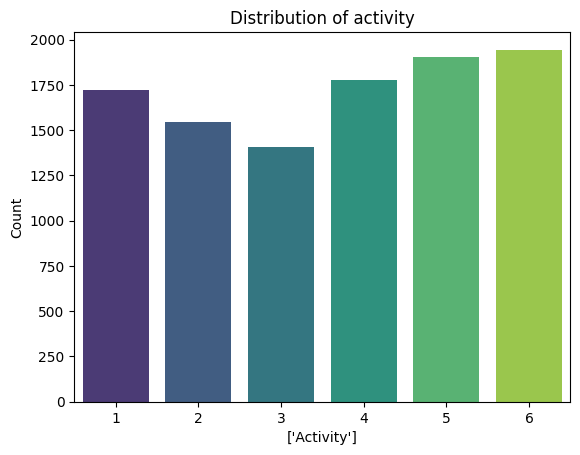

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y["Activity"],
              palette="viridis")

plt.title("Distribution of activity")
plt.xlabel(['Activity'])
plt.ylabel("Count")
plt.show()

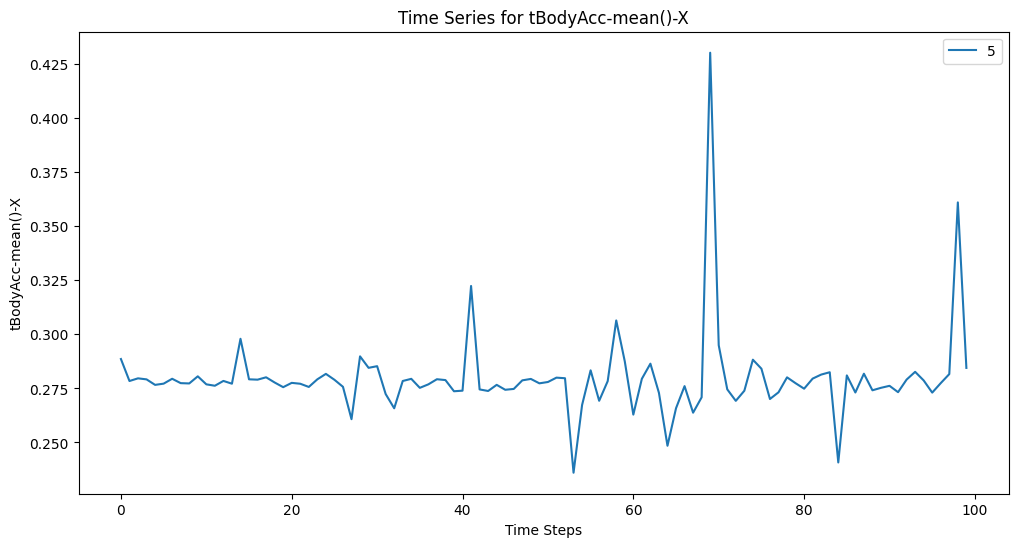

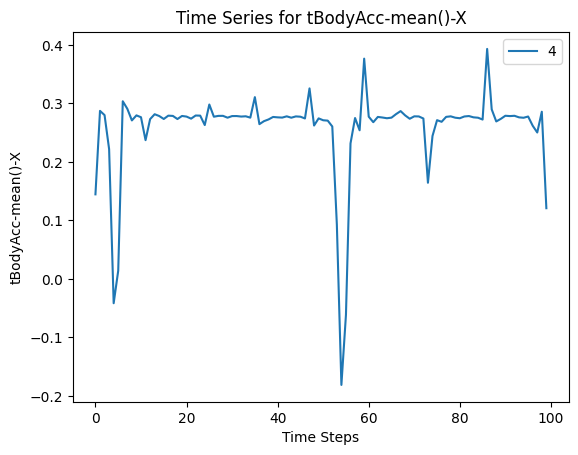

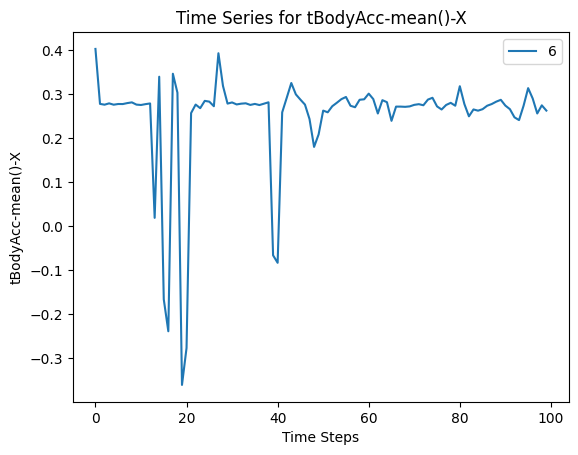

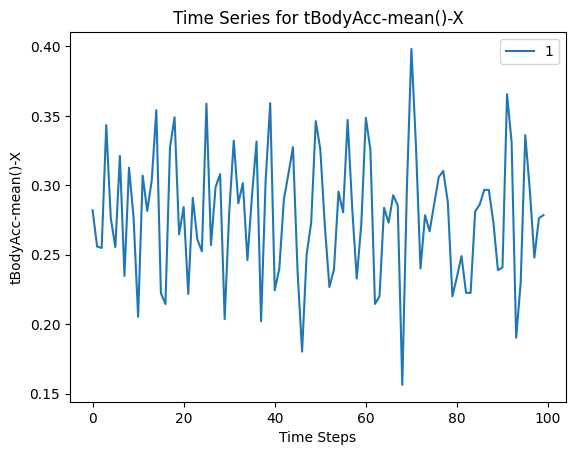

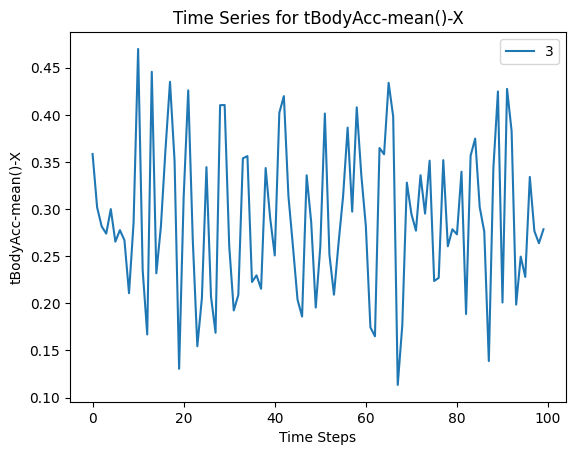

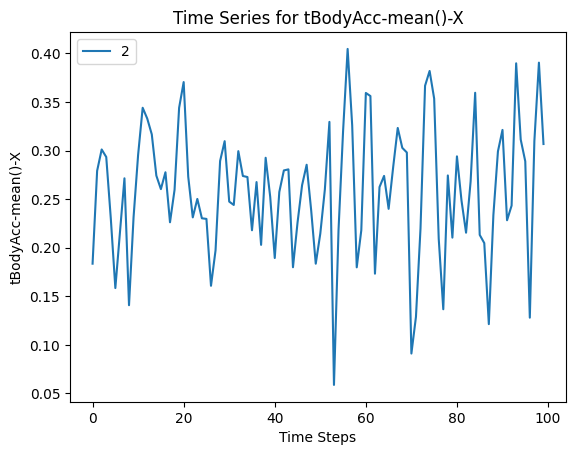

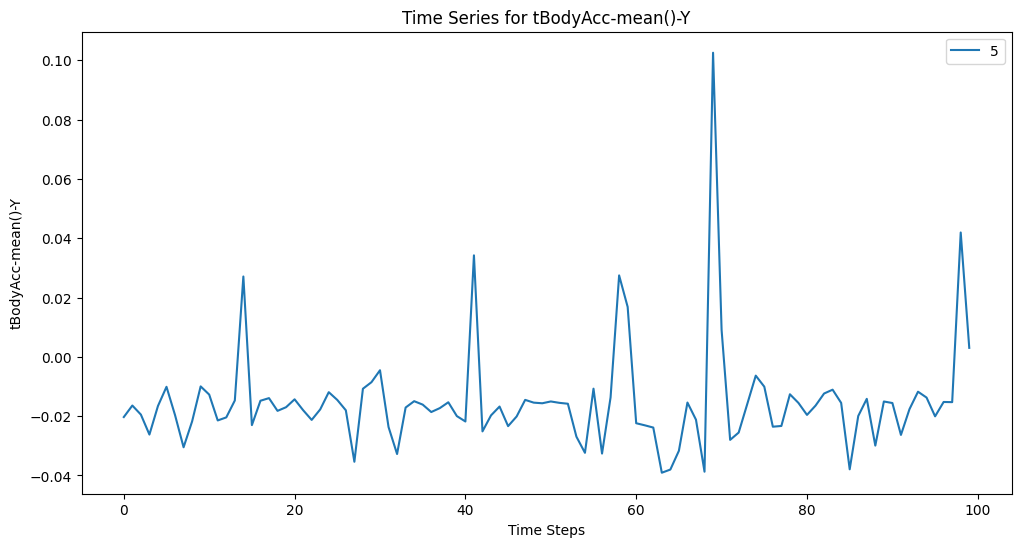

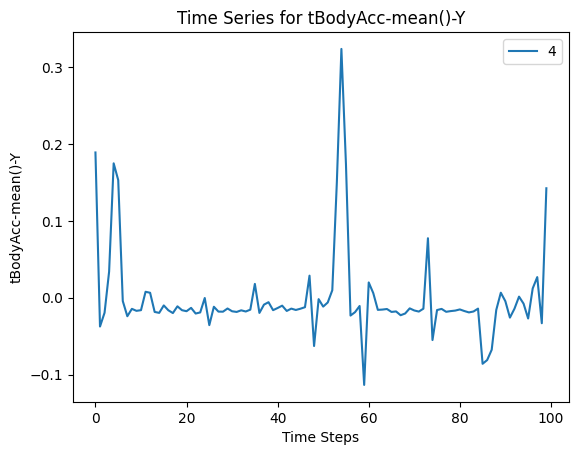

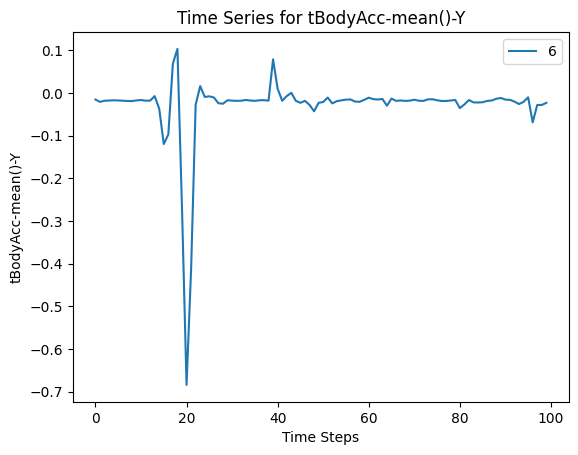

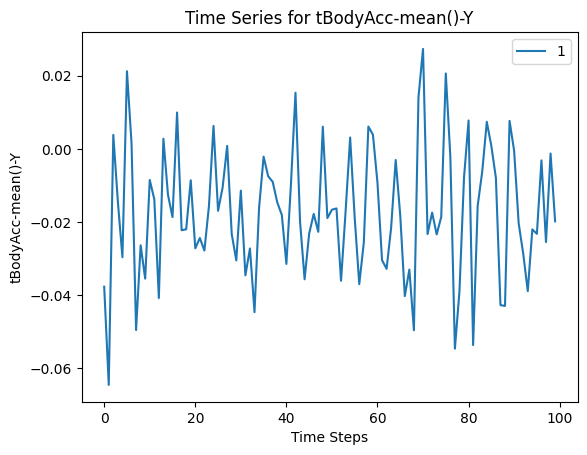

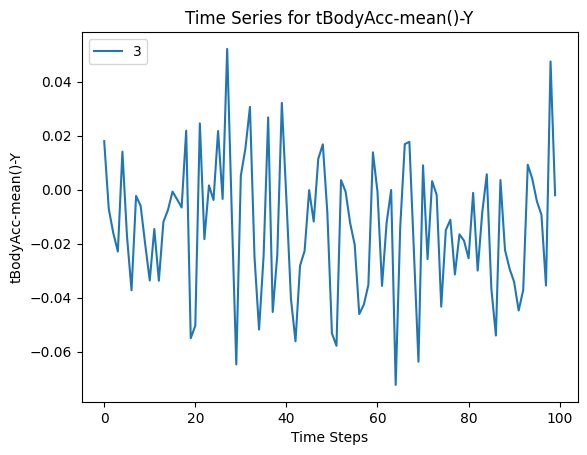

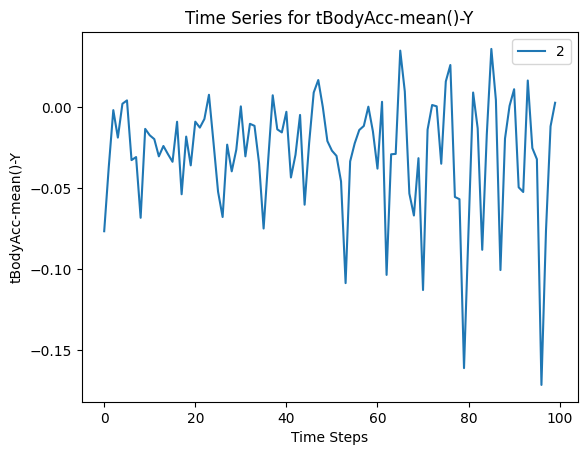

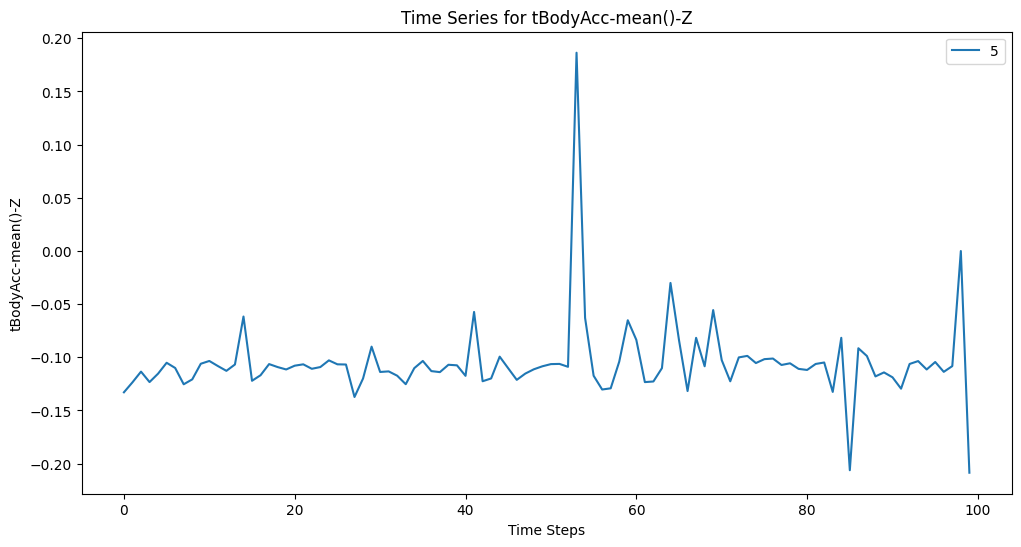

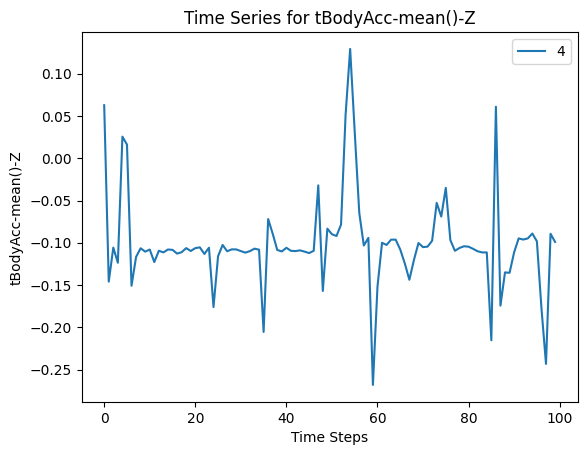

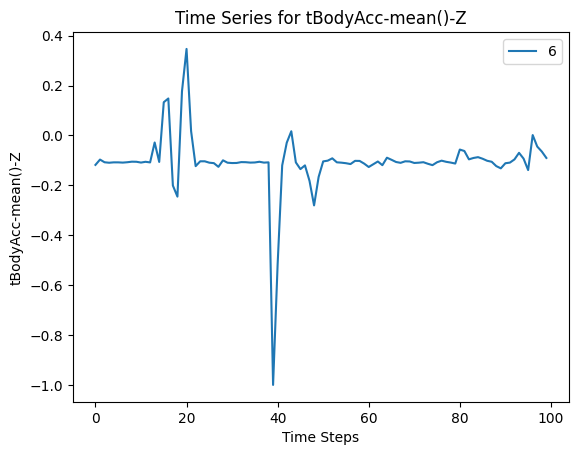

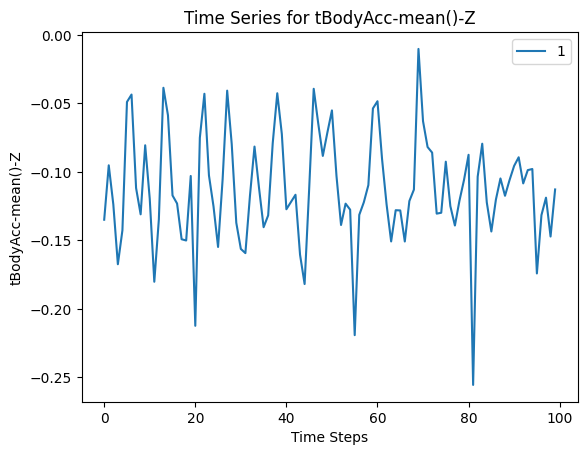

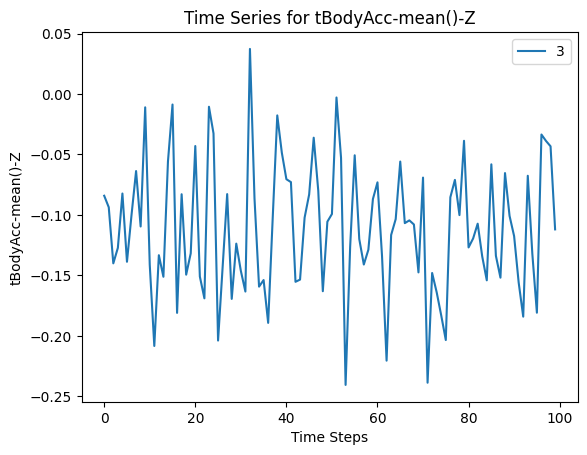

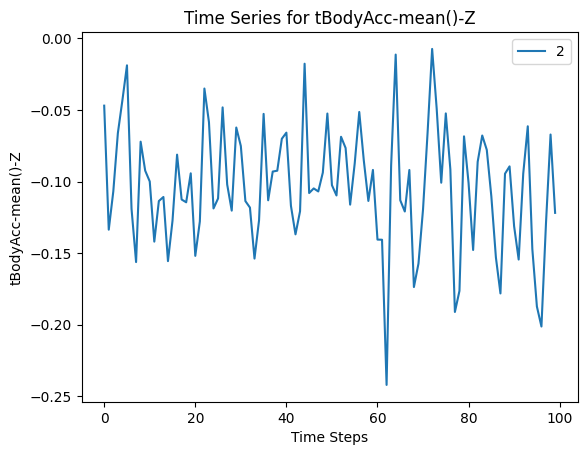

In [ ]:
# Visualize Sample Data
columns_to_plot = ['tBodyAcc-mean()-X',
                   'tBodyAcc-mean()-Y',
                   'tBodyAcc-mean()-Z']

# PLot a few time-series samples for each activity
for col in columns_to_plot:
  plt.figure(figsize=(12, 6))
  for activity in y['Activity'].unique():

    sns.lineplot(x=range(len(X[y['Activity']==activity][col][:100])),
                 y=X[y['Activity']== activity][col][:100],
                 label=activity)

    plt.title(f"Time Series for {col}")
    plt.ylabel(col)
    plt.xlabel('Time Steps')
    plt.legend()
    plt.show()

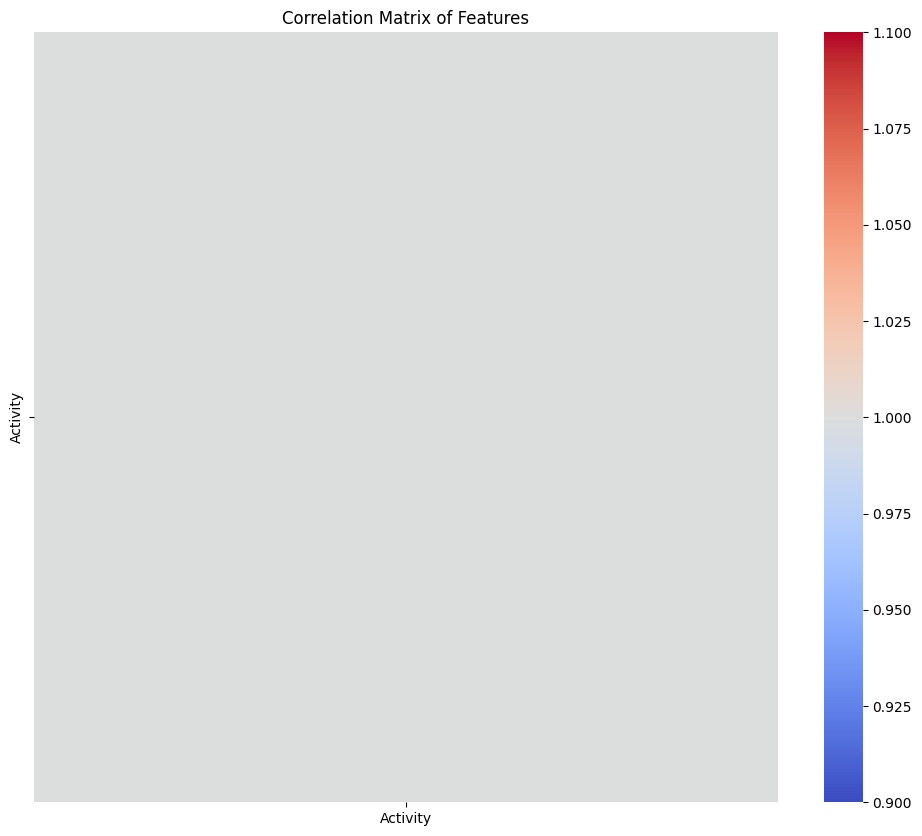

In [ ]:
# Correlation Matrix
correlation_matrix = y.corr()

#plot the ehatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#### Dimensionality Reduction for Visualization

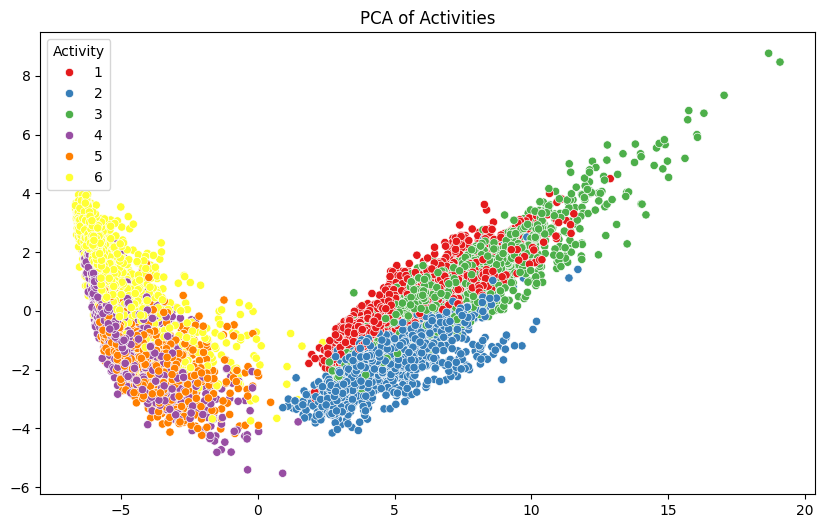

In [ ]:
# PCA

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y['Activity'], palette='Set1')
plt.title('PCA of Activities')
plt.show()

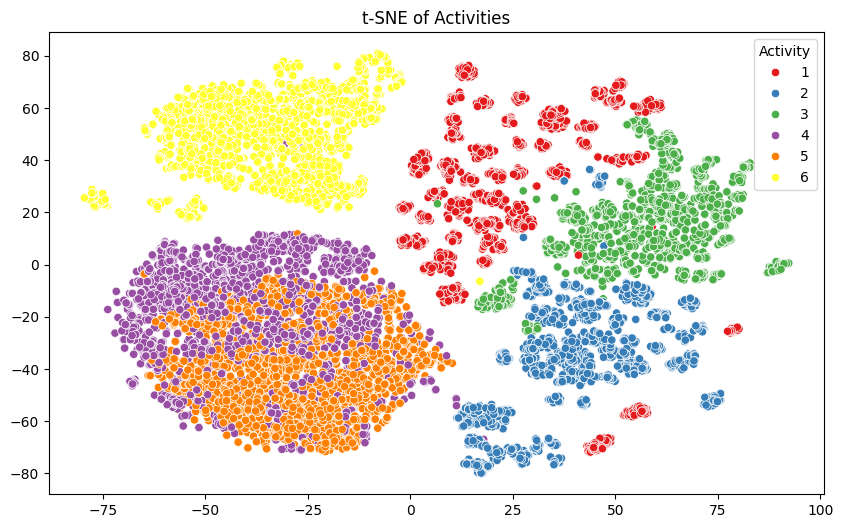

In [ ]:
# t-SNE

from sklearn.manifold import TSNE

# Apply tSNE
tsne = TSNE(n_components=2,
            perplexity=30)

X_tsne = tsne.fit_transform(X)

#PLot the data in 2D space

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y= X_tsne[:, 1], hue=y['Activity'],
                palette = 'Set1')
plt.title('t-SNE of Activities')
plt.show()

## 2. Becoming one with data

### 2.1 Create a custom `Dataset` class

In [ ]:
def find_activity(directory:str):
  activity_labels = pd.read_csv(directory,
                      delim_whitespace=True,
                      header=None)
  all_activity_names = [activity.strip() for activity in activity_labels[1].astype(str)]
  # all_activity_names = list(activity_labels[1])
  all_activity_idx = list(activity_labels[0])
  activity_names_to_idx = {activity_names: i + 1 for i, activity_names in enumerate(all_activity_names)}
  idx_to_activity = {i + 1:activity_names for i, activity_names in enumerate(all_activity_names)}
  return all_activity_names, activity_names_to_idx, idx_to_activity

In [ ]:
all_activity_names, activity_names_to_idx, idx_to_activity = find_activity("/content/data/human_activity_recognition/UCI HAR Dataset/activity_labels.txt")

In [ ]:
all_activity_names, activity_names_to_idx, idx_to_activity

(['WALKING',
  'WALKING_UPSTAIRS',
  'WALKING_DOWNSTAIRS',
  'SITTING',
  'STANDING',
  'LAYING'],
 {'WALKING': 1,
  'WALKING_UPSTAIRS': 2,
  'WALKING_DOWNSTAIRS': 3,
  'SITTING': 4,
  'STANDING': 5,
  'LAYING': 6},
 {1: 'WALKING',
  2: 'WALKING_UPSTAIRS',
  3: 'WALKING_DOWNSTAIRS',
  4: 'SITTING',
  5: 'STANDING',
  6: 'LAYING'})

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

# 1. Subclass torch.utils.data.Dataset
class HARDataset(Dataset):
  # 2. Initialize custom dataset
  def __init__(self,
               target_dir: str,
               train: bool =True):

    # 3. Create class attributes
    self.data_path = target_dir
    self.is_train = train

    self.activities, self.activity_to_idx, self.idx_to_activity = find_activity("/content/data/human_activity_recognition/UCI HAR Dataset/activity_labels.txt")

    # Load features and labels
    if self.is_train:

      # x, y, z body acceleration inertial signals
      self.x_body_acc = self.load_inertial_signals(f"train/Inertial Signals/body_acc_x_train.txt")
      self.y_body_acc = self.load_inertial_signals(f"train/Inertial Signals/body_acc_y_train.txt")
      self.z_body_acc = self.load_inertial_signals(f"train/Inertial Signals/body_acc_z_train.txt")

      # x, y, z total acceleration inertial signals
      self.x_total_acc = self.load_inertial_signals(f"train/Inertial Signals/total_acc_x_train.txt")
      self.y_total_acc = self.load_inertial_signals(f"train/Inertial Signals/total_acc_y_train.txt")
      self.z_total_acc = self.load_inertial_signals(f"train/Inertial Signals/total_acc_z_train.txt")

      # x, y, z gyro signals
      self.x_gyro = self.load_inertial_signals(f"train/Inertial Signals/body_gyro_x_train.txt")
      self.y_gyro = self.load_inertial_signals(f"train/Inertial Signals/body_gyro_y_train.txt")
      self.z_gyro = self.load_inertial_signals(f"train/Inertial Signals/body_gyro_z_train.txt")

      # Load labels
      self.labels = np.loadtxt(f"{self.data_path}/train/y_train.txt", dtype=int) - 1 # Zero indexed labels
    else:
      # x, y, z body acceleration inertial signals
      self.x_body_acc = self.load_inertial_signals(f"test/Inertial Signals/body_acc_x_test.txt")
      self.y_body_acc = self.load_inertial_signals(f"test/Inertial Signals/body_acc_y_test.txt")
      self.z_body_acc = self.load_inertial_signals(f"test/Inertial Signals/body_acc_z_test.txt")

      # x, y, z total acceleration inertial signals
      self.x_total_acc = self.load_inertial_signals(f"test/Inertial Signals/total_acc_x_test.txt")
      self.y_total_acc = self.load_inertial_signals(f"test/Inertial Signals/total_acc_y_test.txt")
      self.z_total_acc = self.load_inertial_signals(f"test/Inertial Signals/total_acc_z_test.txt")

      # x, y, z gyro signals
      self.x_gyro = self.load_inertial_signals(f"test/Inertial Signals/body_gyro_x_test.txt")
      self.y_gyro = self.load_inertial_signals(f"test/Inertial Signals/body_gyro_y_test.txt")
      self.z_gyro = self.load_inertial_signals(f"test/Inertial Signals/body_gyro_z_test.txt")

      # Load labels
      self.labels = np.loadtxt(f"{self.data_path}/test/y_test.txt", dtype=int) - 1# Zero indexed labels

  def load_inertial_signals(self,
                            filename: str):
    return np.loadtxt(f"{self.data_path}/{filename}").reshape(-1, 128, 1) # Reshape to (n_samples, n_steps, 1)


  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    # Stacking all the 9 signals for a single sample( resulting shape to (n_steps, n_features))
    x_data = np.hstack([self.x_body_acc[idx],self.y_body_acc[idx],self.z_body_acc[idx],
                        self.x_total_acc[idx],self.y_total_acc[idx],self.z_total_acc[idx],
                        self.x_gyro[idx],self.y_gyro[idx],self.z_gyro[idx]]) # Shape: (128, 9)

    # Converting data to PyTorch tensor

    x_data = torch.tensor(x_data, dtype=torch.float32)
    label = torch.tensor(self.labels[idx], dtype=torch.long)

    # activity_name =  self.idx_to_activity[self.labels[idx]]
    return x_data, label

In [ ]:
# Testing our custom dataset

train_dataset = HARDataset(target_dir="/content/data/human_activity_recognition/UCI HAR Dataset",
                           train=True)

test_dataset = HARDataset(target_dir="/content/data/human_activity_recognition/UCI HAR Dataset",
                          train=False)

In [ ]:
train_dataset, test_dataset

(<__main__.HARDataset at 0x7a4f5d98ad40>,
 <__main__.HARDataset at 0x7a4f5d9a5630>)

In [ ]:
len(X_train), len(train_dataset)

(7352, 7352)

In [ ]:
len(X_test), len(test_dataset)

(2947, 2947)

In [ ]:
train_dataset.__getitem__(10)

(tensor([[ 5.3247e-03, -3.9310e-03,  5.7720e-04,  ...,  8.5302e-03,
          -3.2437e-02, -2.1667e-02],
         [-6.6761e-04, -8.1707e-03,  3.1060e-03,  ...,  1.7418e-02,
          -2.6761e-02, -1.5581e-02],
         [-4.6643e-03, -1.3470e-02,  4.6963e-03,  ...,  2.5468e-02,
          -2.6941e-02, -1.2804e-02],
         ...,
         [ 3.2420e-04,  1.1914e-03,  6.7149e-03,  ...,  8.8643e-03,
          -5.5671e-03,  6.4437e-03],
         [-3.4095e-04,  1.0548e-03,  6.0124e-03,  ...,  3.1191e-03,
          -5.9939e-03,  6.6364e-03],
         [-1.3813e-03,  1.6189e-03,  2.6571e-03,  ...,  2.6161e-05,
          -1.1258e-03,  5.3915e-03]]),
 tensor(4))

In [ ]:
train_dataset.activities

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [ ]:
train_dataset.activity_to_idx,  train_dataset.idx_to_activity

({'WALKING': 1,
  'WALKING_UPSTAIRS': 2,
  'WALKING_DOWNSTAIRS': 3,
  'SITTING': 4,
  'STANDING': 5,
  'LAYING': 6},
 {1: 'WALKING',
  2: 'WALKING_UPSTAIRS',
  3: 'WALKING_DOWNSTAIRS',
  4: 'SITTING',
  5: 'STANDING',
  6: 'LAYING'})

In [ ]:
# turning test and train Datasets into Dataloaders
import os
NUM_WORKERS = os.cpu_count()
NUM_WORKERS

2

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=0,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             num_workers=0,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a4f5fca85b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a4f5d9a6470>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(230, 93)

In [ ]:
7352 / 32

229.75

In [ ]:
value, label = next(iter(train_dataloader))
value, label

(tensor([[[ 4.2990e-01, -3.7832e-03, -8.0423e-02,  ..., -6.5919e-01,
            1.0906e-01,  3.2002e-01],
          [ 3.6967e-01, -1.6994e-01, -5.6722e-02,  ..., -2.4429e-01,
            5.5422e-02,  3.6727e-01],
          [ 2.7060e-01, -1.9614e-01, -5.2306e-02,  ..., -3.5697e-02,
           -9.0601e-02,  1.4561e-01],
          ...,
          [-1.7693e-01, -3.1937e-02, -1.1662e-01,  ..., -2.3962e-02,
           -5.0293e-01,  1.1524e-01],
          [-1.6443e-01, -5.6210e-02, -8.4239e-02,  ...,  1.4869e-01,
           -3.7526e-01,  9.7767e-02],
          [-2.5222e-01, -2.6384e-02, -8.9035e-02,  ...,  2.9687e-01,
           -4.0523e-01,  8.9615e-02]],
 
         [[-1.2983e-03,  1.3938e-03,  2.2259e-03,  ..., -1.0459e-02,
            7.5055e-03, -2.1782e-02],
          [-1.7158e-03,  1.6727e-03,  5.3421e-03,  ..., -9.9598e-03,
            9.8782e-03, -2.1218e-02],
          [-1.1152e-03,  2.0166e-03,  1.3560e-03,  ..., -8.5057e-03,
            6.9835e-03, -1.9355e-02],
          ...,
    

In [ ]:
for x_batch, y_batch in train_dataloader:
  print(x_batch.shape)

  print(y_batch.shape)

torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Size([32])
torch.Size([32, 128, 9])
torch.Siz

In [ ]:
# Building a model

import torch
import torch.nn as nn

class CNNLSTMModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Conv1d(in_channels=input_shape,
                                  out_channels=hidden_units,
                                  kernel_size=3,
                                  padding=1)
    self.conv_block_2 = nn.Conv1d(in_channels=hidden_units,
                                  out_channels= 2 * hidden_units,
                                  kernel_size=3,
                                  padding=1)
    self.pool = nn.MaxPool1d(kernel_size=2)
    # LSTM Layer
    self.lstm = nn.LSTM(input_size=32,
                        hidden_size=64,
                        batch_first=True)
    # Fully connected layer
    self.fc = nn.Linear(in_features=64,
                        out_features=output_shape)

  def forward(self, x):
    # Input shape: (batch-size, 128, 9)
    # For Conv1d : (batch_size, 9, 128)
    x = x.transpose(1, 2)

    # CNN forward pass
    x = self.conv_block_1(x)
    x = nn.ReLU()(x)
    x = self.pool(x)

    x = self.conv_block_2(x)
    x = nn.ReLU()(x)
    x = self.pool(x)

    # print(x.shape)
    # LSTM forward pass
    x, (hn, cn) = self.lstm(x)
    # batch_size, seq_len, 64 -> batch size, seq_len, 128

    # Only use the hidden state from the last timestep
    x = hn[-1]

    out = self.fc(x)

    return out

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
input_shape = 9
hidden_units = 32
output_shape = 6

torch.manual_seed(42)
model = CNNLSTMModel(input_shape=input_shape,
                     hidden_units=hidden_units,
                     output_shape=output_shape).to(device)

model

CNNLSTMModel(
  (conv_block_1): Conv1d(9, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv_block_2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lstm): LSTM(32, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=6, bias=True)
)

In [ ]:
# Try a forward pass on single reading (to test the model)

x_batch, y_batch = next(iter(train_dataloader))
x_batch.shape, y_batch.shape

# y_batch.min()
# y_batch.max()

(torch.Size([32, 128, 9]), torch.Size([32]))

In [ ]:
y_pred = model(x_batch.to(device))
y_pred.shape

torch.Size([32, 6])

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model, input_size = (1, 128, 9))

Layer (type:depth-idx)                   Output Shape              Param #
CNNLSTMModel                             [1, 6]                    --
├─Conv1d: 1-1                            [1, 32, 128]              896
├─MaxPool1d: 1-2                         [1, 32, 64]               --
├─Conv1d: 1-3                            [1, 64, 64]               6,208
├─MaxPool1d: 1-4                         [1, 64, 32]               --
├─LSTM: 1-5                              [1, 64, 64]               25,088
├─Linear: 1-6                            [1, 6]                    390
Total params: 32,582
Trainable params: 32,582
Non-trainable params: 0
Total mult-adds (M): 2.12
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.13
Estimated Total Size (MB): 0.23

In [ ]:
# Create train and test loop

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device
               ):
  # Put the model in train mode:
  model.train()

  # Setup train loss and train accuracy values:
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_pred = model(X).to(device)

    # y_pred.squeeze(dim=1)
    # print(f"y_pred shape: {y_pred.shape}, y shape: {y.shape}")

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer Zero grad
    optimizer.zero_grad()

    # 4. Loss Backwards
    loss.backward()

    # 5. Oprimizer step
    optimizer.step()

    # Calculate accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust metric to get  average loss and accuracy per batch

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      test_pred_logits = model(X)

      # Calculate the loss

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()


      # Calculate the accuracy
      test_pred_labels =test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y)).sum().item() / len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device =device):

  # Create aempty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             'test_acc': []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [ ]:
# Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance

model_0 = CNNLSTMModel(
    input_shape= 9,
    hidden_units=32,
    output_shape= 6
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.9268 | Train Acc: 0.5633 | Test Loss: 0.6409 | Test Acc: 0.6626
Epoch: 1 | Train Loss: 0.6163 | Train Acc: 0.6802 | Test Loss: 0.6232 | Test Acc: 0.7024
Epoch: 2 | Train Loss: 0.5893 | Train Acc: 0.7039 | Test Loss: 0.5315 | Test Acc: 0.7323
Epoch: 3 | Train Loss: 0.4957 | Train Acc: 0.7613 | Test Loss: 0.4865 | Test Acc: 0.7543
Epoch: 4 | Train Loss: 0.4420 | Train Acc: 0.7896 | Test Loss: 0.4122 | Test Acc: 0.7844
Epoch: 5 | Train Loss: 0.3833 | Train Acc: 0.8214 | Test Loss: 0.3453 | Test Acc: 0.8509
Epoch: 6 | Train Loss: 0.2981 | Train Acc: 0.8803 | Test Loss: 0.2222 | Test Acc: 0.9168
Epoch: 7 | Train Loss: 0.2148 | Train Acc: 0.9256 | Test Loss: 0.1530 | Test Acc: 0.9502
Epoch: 8 | Train Loss: 0.2831 | Train Acc: 0.9025 | Test Loss: 0.2058 | Test Acc: 0.9362
Epoch: 9 | Train Loss: 0.1746 | Train Acc: 0.9367 | Test Loss: 0.1486 | Test Acc: 0.9428
Total training time: 110.284 seconds


In [ ]:
model_0_results

{'train_loss': [0.9268436785625375,
  0.6163014830454536,
  0.5893293410539627,
  0.49566029258396316,
  0.4419597944487696,
  0.3832921464158141,
  0.2980585642158985,
  0.2148141580755296,
  0.283110781321707,
  0.17457494496003442],
 'train_acc': [0.5633152173913043,
  0.6801630434782608,
  0.7039402173913043,
  0.7612771739130435,
  0.7896286231884059,
  0.8214221014492754,
  0.8802536231884058,
  0.9256340579710145,
  0.902536231884058,
  0.9366847826086957],
 'test_loss': [0.6409337400094323,
  0.6231549243564191,
  0.5314826456101044,
  0.48648208055807196,
  0.41223676224117695,
  0.34529837020065474,
  0.22215492071016976,
  0.15302536259202854,
  0.20583934589572575,
  0.14858401193404974],
 'test_acc': [0.6626358695652174,
  0.7024456521739131,
  0.7323369565217391,
  0.7543025362318841,
  0.784375,
  0.8508605072463767,
  0.9168025362318841,
  0.9502264492753624,
  0.9361865942028985,
  0.9427989130434783]}

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

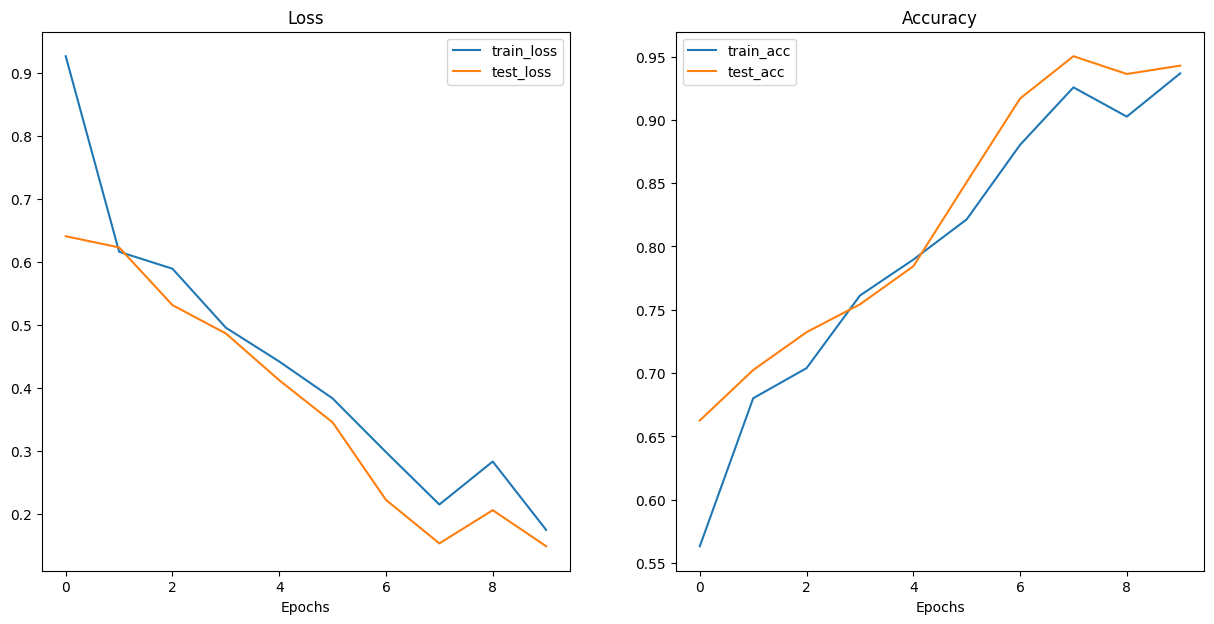

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
# Transformer Model building

In [ ]:
import torch
import torch.nn as nn

class TransformerModel(nn.Module):
  """ This model is an ins[iration from https://github.com/timeseriesAI/tsai/blob/main/tsai/models/TransformerModel.py]"""

  def __init__(self,
               input_dim,
               num_classes,
               d_model=64,
               n_head=4,
               num_encoder_layers=2,
               dim_feedforward=128,
               dropout=0.1):
    super().__init__()

    # Transformer Encoder
    self.embedding = nn.Linear(in_features=input_dim,
                               out_features=d_model)

    encoder_layer = nn.TransformerEncoderLayer(d_model=d_model,
                                               nhead=n_head,
                                               dim_feedforward=dim_feedforward,
                                               dropout=dropout)

    self.transformer_encoder = nn.TransformerEncoder(encoder_layer,
                                                     num_layers=num_encoder_layers,
                                                     )

    # Fully connected layer
    self.fc = nn.Linear(d_model,
                        num_classes)

  def forward(self, x):
    x = self.embedding(x)
    x = x.permute(1, 0, 2)
    x = self.transformer_encoder(x)
    x = x.mean(dim=0)
    x=self.fc(x)

    return (x)

In [ ]:
input_dim = 9
num_classes = 6

transformer_model = TransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=64,
    n_head=4,
    num_encoder_layers=2,
    dim_feedforward=128,
    dropout=0.1
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
import torch
import torch.nn as nn

class ImprovedTransformerModel(nn.Module):
    def __init__(self,
                 input_dim,
                 num_classes,
                 d_model=128,  # Increased model dimension
                 n_head=8,  # Increased number of heads
                 num_encoder_layers=4,  # Increased number of layers
                 dim_feedforward=256,  # Increased feedforward dimension
                 dropout=0.2):  # Increased dropout
        super().__init__()

        self.embedding = nn.Linear(in_features=input_dim, out_features=d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_head,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)
        x = self.fc(x)
        return x

In [ ]:
 # Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance



model_7 = ImprovedTransformerModel(
    input_dim=input_dim,
    num_classes=num_classes,
    d_model=128,
    n_head=8,
    num_encoder_layers=4,
    dim_feedforward=256,
    dropout=0.2
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_7,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.8539 | Train Acc: 0.1221 | Test Loss: 1.8645 | Test Acc: 0.1213
Epoch: 1 | Train Loss: 1.8541 | Train Acc: 0.1240 | Test Loss: 1.8645 | Test Acc: 0.1216
Epoch: 2 | Train Loss: 1.8542 | Train Acc: 0.1226 | Test Loss: 1.8644 | Test Acc: 0.1217
Epoch: 3 | Train Loss: 1.8544 | Train Acc: 0.1234 | Test Loss: 1.8643 | Test Acc: 0.1215
Epoch: 4 | Train Loss: 1.8542 | Train Acc: 0.1233 | Test Loss: 1.8646 | Test Acc: 0.1214
Epoch: 5 | Train Loss: 1.8539 | Train Acc: 0.1232 | Test Loss: 1.8646 | Test Acc: 0.1215
Epoch: 6 | Train Loss: 1.8537 | Train Acc: 0.1228 | Test Loss: 1.8645 | Test Acc: 0.1215
Epoch: 7 | Train Loss: 1.8544 | Train Acc: 0.1223 | Test Loss: 1.8646 | Test Acc: 0.1213
Epoch: 8 | Train Loss: 1.8539 | Train Acc: 0.1240 | Test Loss: 1.8645 | Test Acc: 0.1214
Epoch: 9 | Train Loss: 1.8539 | Train Acc: 0.1226 | Test Loss: 1.8645 | Test Acc: 0.1214
Total training time: 2015.203 seconds


In [ ]:
# class TransformerModel(nn.Module):
#     def __init__(self, input_dim, num_classes, d_model=64, n_head=1, d_ffn=128, dropout=0.1, activation="relu", n_layers=1):
#         """
#         Args:
#             c_in: the number of features (aka variables, dimensions, channels) in the time series dataset
#             c_out: the number of target classes
#             d_model: total dimension of the model.
#             nhead:  parallel attention heads.
#             d_ffn: the dimension of the feedforward network model.
#             dropout: a Dropout layer on attn_output_weights.
#             activation: the activation function of intermediate layer, relu or gelu.
#             num_layers: the number of sub-encoder-layers in the encoder.

#         Input shape:
#             bs (batch size) x nvars (aka variables, dimensions, channels) x seq_len (aka time steps)
#             """
#         super().__init__()
#         # self.permute = Permute(2, 0, 1)
#         self.inlinear = nn.Linear(input_dim, d_model)
#         self.relu = nn.ReLU()
#         encoder_layer = nn.TransformerEncoderLayer(d_model, n_head, dim_feedforward=d_ffn, dropout=dropout, activation=activation)
#         encoder_norm = nn.LayerNorm(d_model)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, n_layers, norm=encoder_norm)
#         # self.transpose = transpose(1, 0)
#         # self.max = Max(1)
#         self.outlinear = nn.Linear(d_model, num_classes)

#     def forward(self,x):
#         x = x.permute(1,0,2) # bs x nvars x seq_len -> seq_len x bs x nvars
#         x = self.inlinear(x) # seq_len x bs x nvars -> seq_len x bs x d_model
#         x = self.relu(x)
#         x = self.transformer_encoder(x)
#         x = x.transpose(1, 2) # seq_len x bs x d_model -> bs x seq_len x d_model
#         x = x.mean(dim=0)
#         x = self.relu(x)
#         x = self.outlinear(x)
#         return x

In [ ]:
import torch
import torch.nn as nn
from torch.nn.modules.transformer import TransformerEncoder, TransformerEncoderLayer

class TransformerModel(nn.Module):
    def __init__(self, c_in, c_out, d_model=64, n_head=1, d_ffn=128, dropout=0.1, activation="relu", n_layers=1):
        super(TransformerModel, self).__init__()

        self.inlinear = nn.Linear(c_in, d_model)  # Project input features to d_model dimensions
        self.relu = nn.ReLU()

        encoder_layer = TransformerEncoderLayer(d_model, n_head, dim_feedforward=d_ffn, dropout=dropout, activation=activation)
        encoder_norm = nn.LayerNorm(d_model)
        self.transformer_encoder = TransformerEncoder(encoder_layer, n_layers, norm=encoder_norm)

        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.outlinear = nn.Linear(d_model, c_out)

    def forward(self, x):
        # Expected input shape: [batch_size, nvars, seq_len]
        print(f"Input shape: {x.shape}")

        # Permute for transformer [batch_size, nvars, seq_len] -> [seq_len, batch_size, nvars]
        x = x.permute(2, 0, 1)
        print(f"Shape after permute: {x.shape}")

        # Apply input linear transformation
        x = self.inlinear(x)  # [seq_len, batch_size, c_in] -> [seq_len, batch_size, d_model]
        x = self.relu(x)
        print(f"Shape after inlinear: {x.shape}")

        # Pass through transformer encoder
        x = self.transformer_encoder(x)  # [seq_len, batch_size, d_model]
        print(f"Shape after transformer_encoder: {x.shape}")

        # Permute back [seq_len, batch_size, d_model] -> [batch_size, d_model, seq_len]
        x = x.permute(1, 2, 0)
        print(f"Shape after permute 2: {x.shape}")

        # Apply adaptive pooling to reduce sequence length dimension
        x = self.avg_pool(x).squeeze(-1)  # [batch_size, d_model]
        print(f"Shape after avg_pool: {x.shape}")

        # Final linear layer to project to output classes
        x = self.outlinear(x)  # [batch_size, c_out]
        print(f"Final output shape: {x.shape}")
        return x

# Example instantiation
model = TransformerModel(c_in=9, c_out=6, d_model=64)

# Test with dummy data
dummy_input = torch.randn(32, 9, 128)  # [batch_size, nvars, seq_len]
output = model(dummy_input)


Input shape: torch.Size([32, 9, 128])
Shape after permute: torch.Size([128, 32, 9])
Shape after inlinear: torch.Size([128, 32, 64])
Shape after transformer_encoder: torch.Size([128, 32, 64])
Shape after permute 2: torch.Size([32, 64, 128])
Shape after avg_pool: torch.Size([32, 64])
Final output shape: torch.Size([32, 6])


In [ ]:
 # Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance



model_1 = TransformerModel(
    input_dim, num_classes, d_model=64, n_head=1, d_ffn=128, dropout=0.1, activation="relu", n_layers=1
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Input shape: torch.Size([32, 128, 9])
Shape after permute: torch.Size([9, 32, 128])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (288x128 and 9x64)

In [ ]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerModel

# Initializing a Time Series Transformer configuration with 12 time steps for prediction
configuration = TimeSeriesTransformerConfig(prediction_length=12)

# Randomly initializing a model (with random weights) from the configuration
model = TimeSeriesTransformerModel(configuration)

# Accessing the model configuration
configuration = model.config
configuration


In [ ]:

model

In [ ]:
nn.Transformer

In [ ]:
transformer = nn.Transformer
transformer

In [ ]:
from transformers import TimeSeriesTransformerForPrediction

transformer = TimeSeriesTransformerForPrediction.from_pretrained("huggingface/time-series-transformer-tourism-monthly"
)

In [ ]:
transformer


In [ ]:
transformer.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=9,
              out_features=6)
).to(device)

In [ ]:
transformer

In [ ]:
from torchinfo import summary

summary(model=transformer,
        input_size=(1, 128,9), # batch size, color_channels , height, width
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

In [ ]:
for param in transformer.embedder.parameters():
  param.requires_grad = False

In [ ]:
from huggingface_hub import hf_hub_download
import torch
from transformers import TimeSeriesTransformerForPrediction

file = hf_hub_download(
    repo_id="hf-internal-testing/tourism-monthly-batch", filename="train-batch.pt", repo_type="dataset"
)
batch = torch.load(file)

model = TimeSeriesTransformerForPrediction.from_pretrained(
    "huggingface/time-series-transformer-tourism-monthly"
)

# during training, one provides both past and future values
# as well as possible additional features
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
)

loss = outputs.loss
loss.backward()

# during inference, one only provides past values
# as well as possible additional features
# the model autoregressively generates future values
outputs = model.generate(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"],
    static_real_features=batch["static_real_features"],
    future_time_features=batch["future_time_features"],
)

mean_prediction = outputs.sequences.mean(dim=1)

In [ ]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

In [ ]:
pipeline

In [ ]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, n_classes, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(d_model)
        self.input_projection = nn.Linear(input_dim, d_model)

        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)

        self.d_model = d_model
        self.decoder = nn.Linear(d_model, n_classes)

        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.input_projection.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        # src shape: (batch_size, seq_len, input_dim)
        src = src.transpose(0, 1)  # (seq_len, batch_size, input_dim)

        src = self.input_projection(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = output.mean(dim=0)  # Average pooling over sequence length
        output = self.decoder(output)
        return output

# Hyperparameters
input_dim = 9  # Number of sensor channels
d_model = 64  # Embedding dimension
nhead = 4  # Number of attention heads
num_layers = 3  # Number of transformer layers
dim_feedforward = 256  # Dimension of feedforward network
n_classes = 6  # Number of activity classes

# Define the model
model = TransformerModel(input_dim, d_model, nhead, num_layers, dim_feedforward, n_classes)

# Example forward pass
x_example = torch.randn(32, 128, 9)  # (batch_size, seq_length, input_channels)
output = model(x_example)
print(output.shape)  # Should print torch.Size([32, 6])

# Training loop (pseudo-code)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#
# for epoch in range(num_epochs):
#     for batch in train_loader:
#         inputs, labels = batch
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

In [ ]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, n_classes, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(d_model)
        self.input_projection = nn.Linear(input_dim, d_model)

        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)

        self.d_model = d_model
        self.decoder = nn.Linear(d_model, n_classes)

        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.input_projection.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src):
        # src shape: (batch_size, seq_len, input_dim)
        src = src.transpose(0, 1)  # (seq_len, batch_size, input_dim)

        src = self.input_projection(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = output.mean(dim=0)  # Average pooling over sequence length
        output = self.decoder(output)
        return output

# Hyperparameters
input_dim = 9  # Number of sensor channels
d_model = 64  # Embedding dimension
nhead = 4  # Number of attention heads
num_layers = 3  # Number of transformer layers
dim_feedforward = 256  # Dimension of feedforward network
n_classes = 6  # Number of activity classes

# Define the model
model_3 = TransformerModel(input_dim, d_model, nhead, num_layers, dim_feedforward, n_classes).to(device)

# Example forward pass
x_example = torch.randn(32, 128, 9)  # (batch_size, seq_length, input_channels)
output = model(x_example)
print(output.shape)  # Should print torch.Size([32, 6])

# Training loop (pseudo-code)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#
# for epoch in range(num_epochs):
#     for batch in train_loader:
#         inputs, labels = batch
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionLayer(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(AttentionLayer, self).__init__()
        self.attention = nn.Sequential(
            nn.Linear(input_dim, attention_dim),
            nn.Tanh(),
            nn.Linear(attention_dim, 1)
        )

    def forward(self, x):
        attention_weights = F.softmax(self.attention(x).squeeze(-1), dim=1)
        return torch.sum(x * attention_weights.unsqueeze(-1), dim=1)

class ImprovedHARModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, dropout=0.5):
        super(ImprovedHARModel, self).__init__()

        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim * 2, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim * 2)

        self.lstm = nn.LSTM(hidden_dim * 2, hidden_dim, num_layers, batch_first=True, bidirectional=True, dropout=dropout)

        self.attention = AttentionLayer(hidden_dim * 2, hidden_dim)

        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_dim)
        x = x.transpose(1, 2)  # (batch_size, input_dim, sequence_length)

        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool1d(x, 2)

        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool1d(x, 2)

        x = x.transpose(1, 2)  # (batch_size, sequence_length, hidden_dim * 2)

        x, _ = self.lstm(x)

        x = self.attention(x)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Hyperparameters
input_dim = 9  # Number of sensor channels
hidden_dim = 64
num_layers = 2
num_classes = 6  # Number of activity classes
dropout = 0.5

# Initialize the model
model_4 = ImprovedHARModel(input_dim, hidden_dim, num_layers, num_classes, dropout).to(device)

# Print model summary
print(model)

# Example usage
batch_size = 32
sequence_length = 128
x = torch.randn(batch_size, sequence_length, input_dim)
output = model(x)
print("Output shape:", output.shape)

In [ ]:
# Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance



#model_1 = TransformerModel(
    #input_dim, num_classes, d_model=64, n_head=1, d_ffn=128, dropout=0.1, activation="relu", n_layers=1
#).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_4,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

In [ ]:
import torch
import torch.nn as nn

class ImprovedCNNLSTMModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int, num_layers: int = 2, dropout: float = 0.2) -> None:
        super().__init__()
        self.conv_blocks = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(in_channels=input_shape if i == 0 else hidden_units * (2 ** i),
                          out_channels=hidden_units * (2 ** (i + 1)),
                          kernel_size=3,
                          padding=1),
                nn.BatchNorm1d(hidden_units * (2 ** (i + 1))),
                nn.ReLU(),
                nn.MaxPool1d(kernel_size=2)
            ) for i in range(num_layers)
        ])

        self.dropout = nn.Dropout(dropout)

        # Calculate the input size for the LSTM layer
        self.lstm_input_size = hidden_units * (2 ** num_layers) * (128 // (2 ** num_layers))

        # LSTM Layer
        self.lstm = nn.LSTM(input_size=self.lstm_input_size,
                            hidden_size=hidden_units * 4,
                            num_layers=2,
                            batch_first=True,
                            dropout=dropout,
                            bidirectional=True)

        # Attention mechanism
        self.attention = nn.Linear(hidden_units * 8, 1)

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(hidden_units * 8, hidden_units * 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_units * 4, output_shape)
        )

    def forward(self, x):
        # Input shape: (batch-size, 128, 9)
        # For Conv1d : (batch_size, 9, 128)
        x = x.transpose(1, 2)

        # CNN forward pass
        for conv_block in self.conv_blocks:
            x = conv_block(x)

        # Prepare for LSTM
        batch_size, features, seq_len = x.shape
        x = x.permute(0, 2, 1)  # (batch_size, seq_len, features)
        x = x.reshape(batch_size, seq_len, -1)

        # LSTM forward pass
        x, (hn, cn) = self.lstm(x)

        # Attention mechanism
        attention_weights = torch.softmax(self.attention(x).squeeze(-1), dim=1)
        x = torch.bmm(attention_weights.unsqueeze(1), x).squeeze(1)

        # Fully connected layers
        out = self.fc(x)

        return out

In [ ]:
# Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance

model_6 =ImprovedCNNLSTMModel(
    input_shape= 9,
    hidden_units=32,
    output_shape= 6
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

In [ ]:
import torch
import torch.nn as nn

class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, num_classes, lstm_hidden_size=128, num_lstm_layers=2):
        super(BiLSTMModel, self).__init__()

        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=lstm_hidden_size, num_layers=num_lstm_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # *2 for bidirectional LSTM

    def forward(self, x):
        # Input shape: [batch_size, seq_len, input_dim]
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take the last output of the LSTM
        x = self.fc(x)
        return x

In [ ]:
# Train and evalute

# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs

NUM_EPOCHS = 10

# Create model instance

model_8 =BiLSTMModel(
    input_dim= 9,
    num_classes= 6
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_8,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")